In [6]:
import logging
logging.getLogger().setLevel(logging.ERROR)
from pathlib import Path
from docembedder import DataModel
from docembedder.analysis import DocAnalysis
from matplotlib import pyplot as plt
import numpy as np

In [7]:
data_dir =  Path("..", "data")
output_dir = Path("..", "data", "results")
output_fp = output_dir / "tfidf.h5"


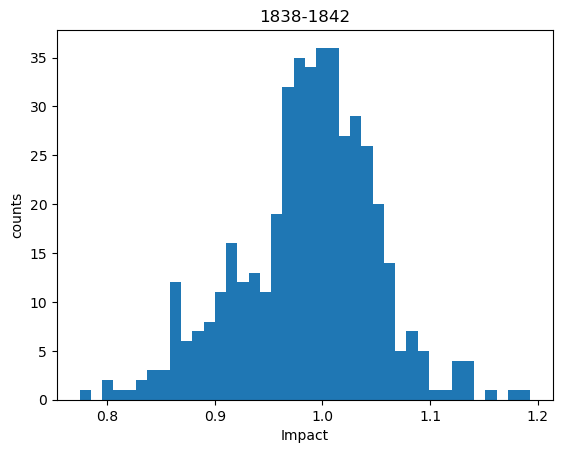

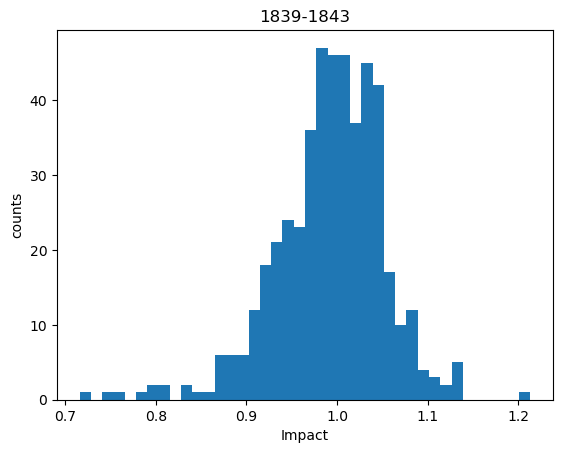

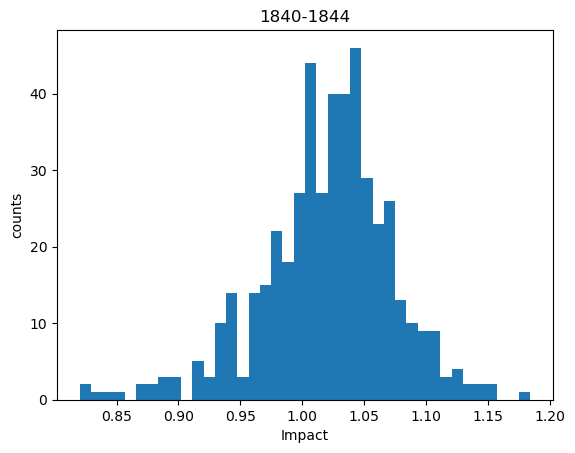

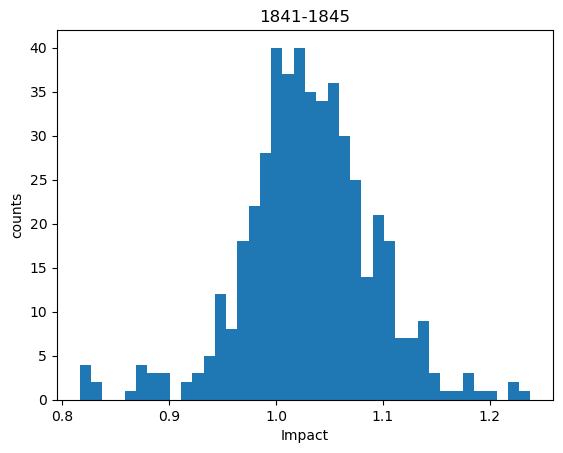

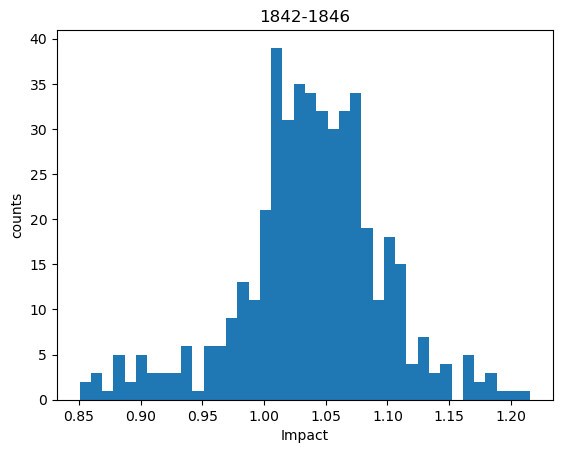

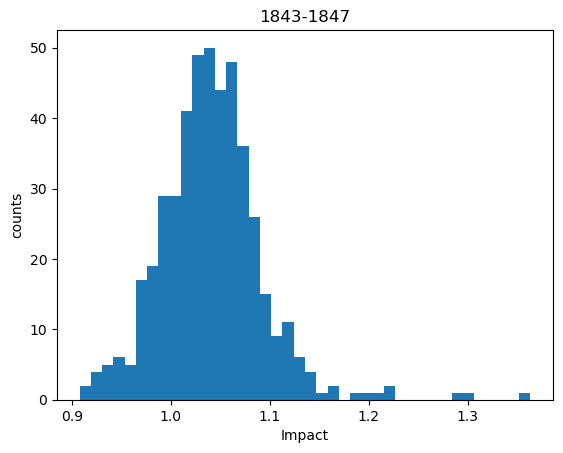

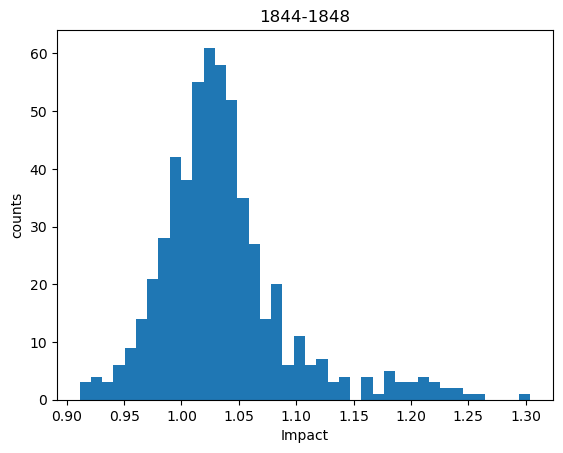

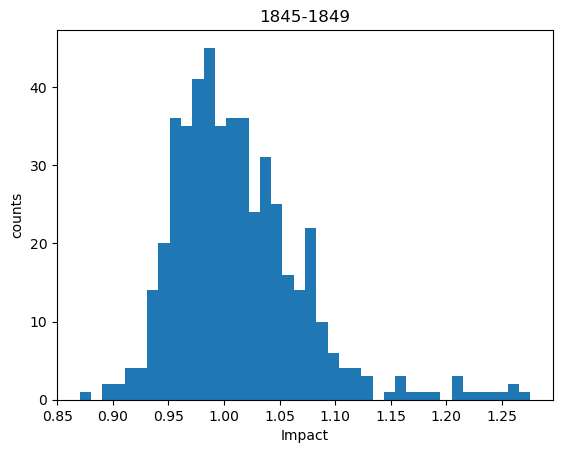

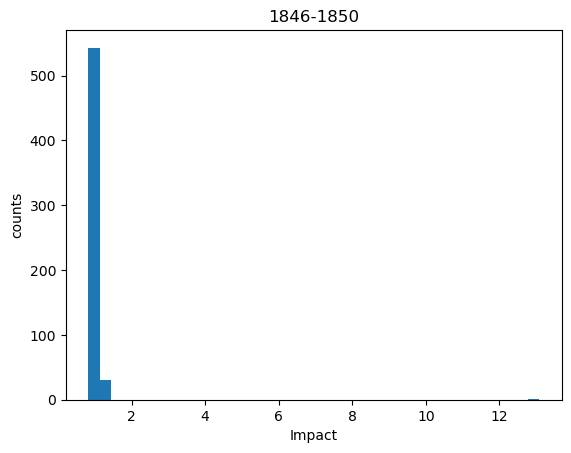

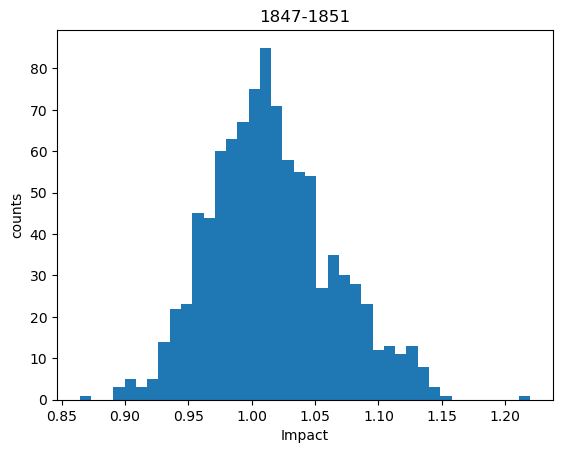

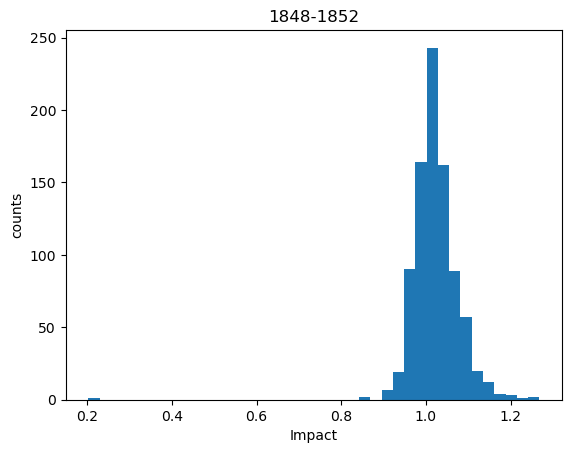

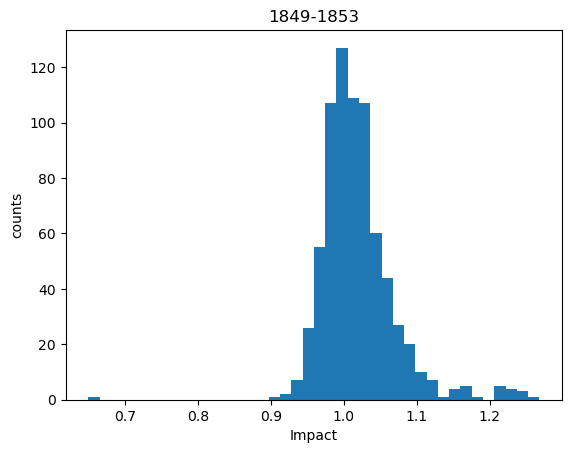

CPU times: user 764 ms, sys: 49.5 ms, total: 814 ms
Wall time: 860 ms


In [8]:
%%time
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    for window, model in data.iterate_window_models(model_name='default-tfidf-default'):
        impact = analysis.patent_impacts(window, model)
        plt.title(window)
        plt.hist(impact, bins=40)
        plt.xlabel("Impact")
        plt.ylabel("counts")
        plt.show()

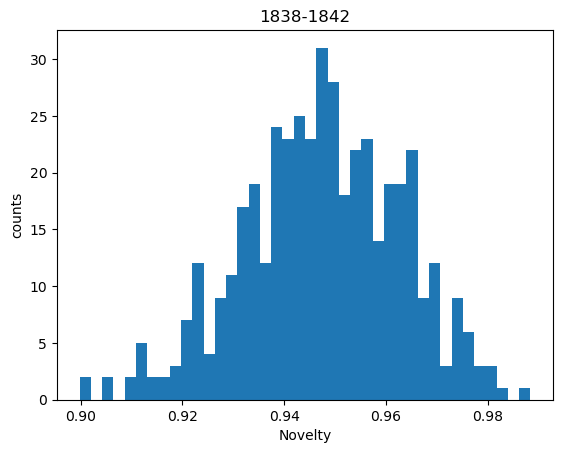

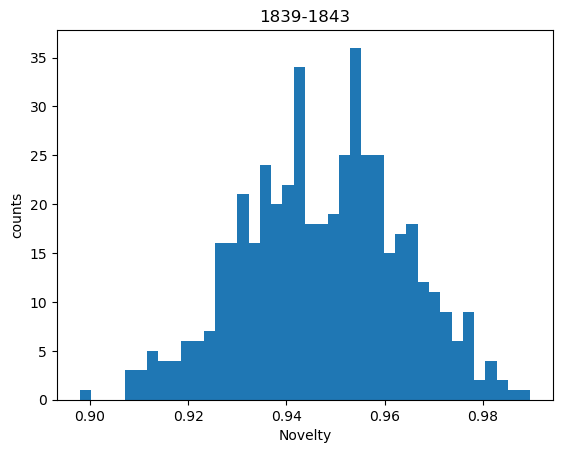

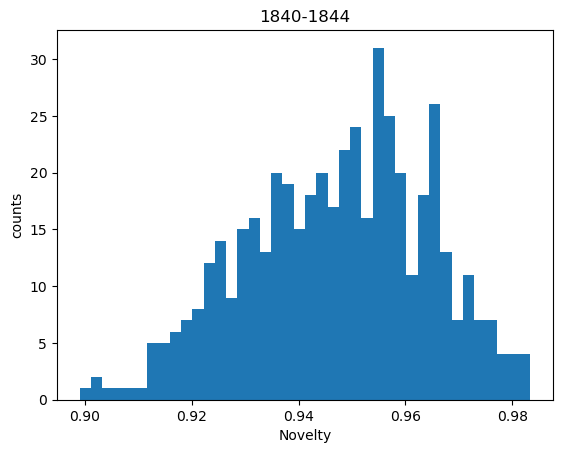

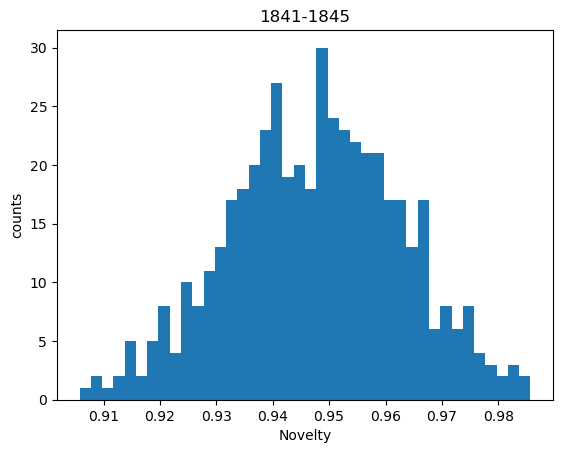

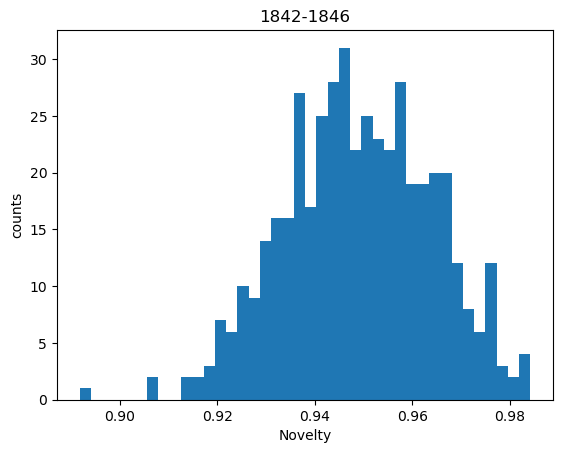

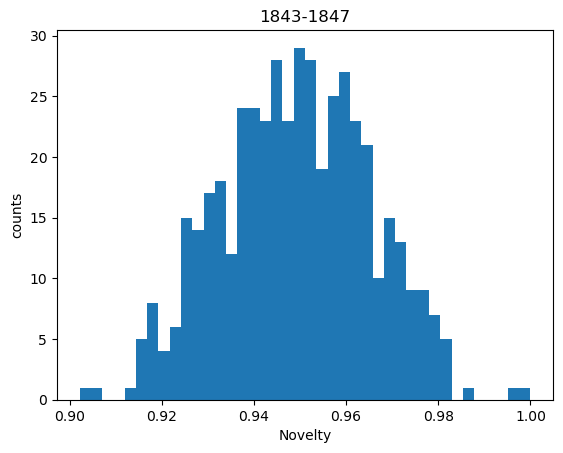

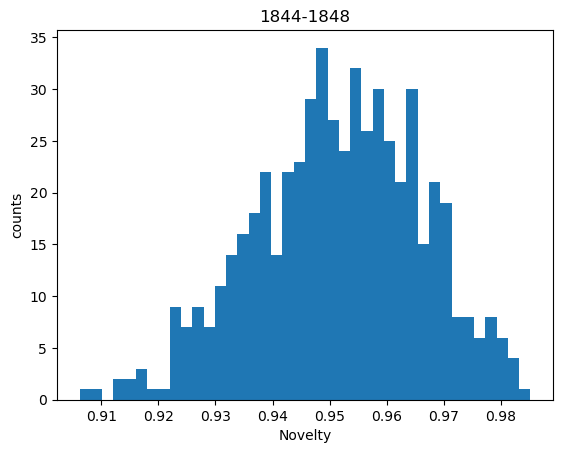

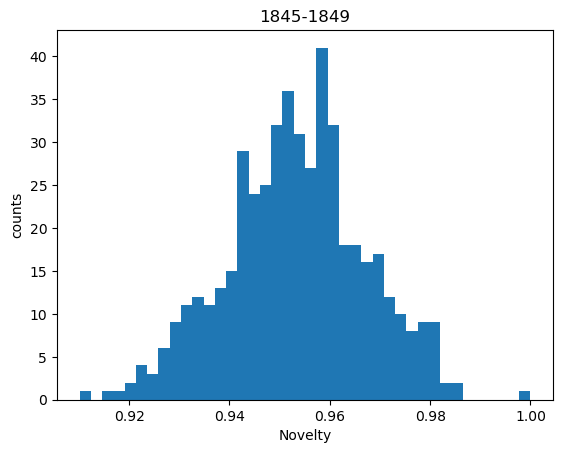

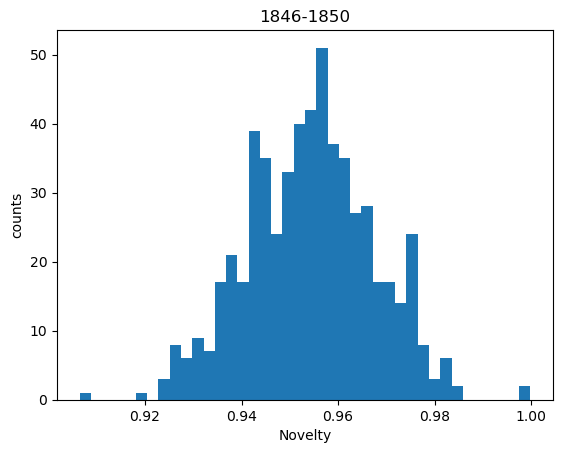

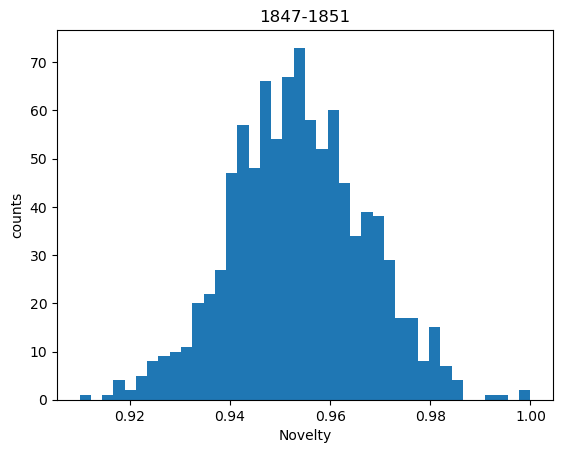

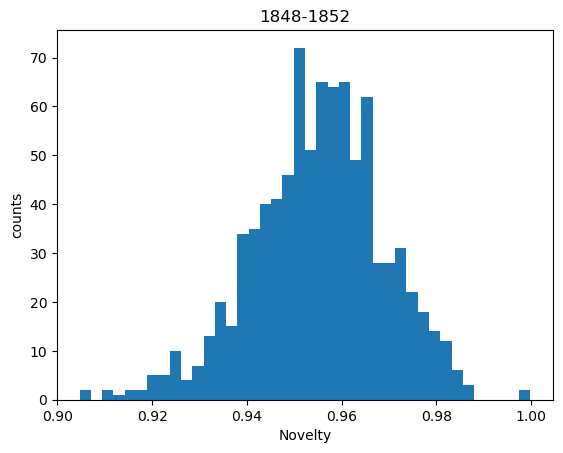

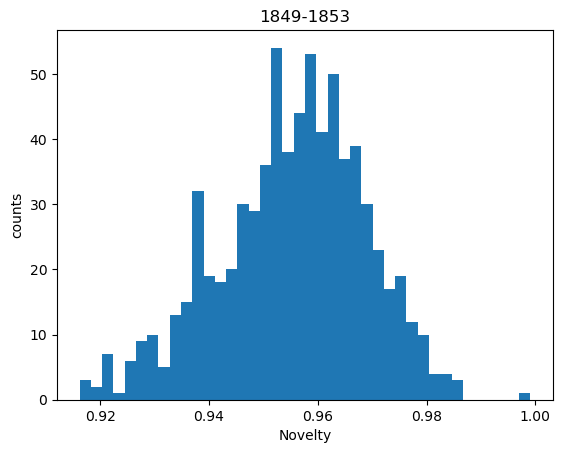

CPU times: user 881 ms, sys: 71.8 ms, total: 953 ms
Wall time: 1.04 s


In [11]:
%%time
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    for window, model in data.iterate_window_models(model_name='default-tfidf-default'):
        novelty = analysis.patent_novelties(window, model)
        plt.title(window)
        plt.hist(novelty, bins=40)
        plt.xlabel("Novelty")
        plt.ylabel("counts")
        plt.show()

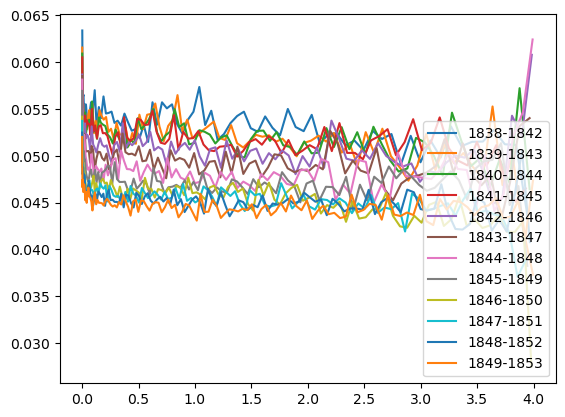

In [12]:
with DataModel(output_fp, read_only=True) as data:
    analysis = DocAnalysis(data)
    for window, model in data.iterate_window_models(model_name='default-tfidf-default'):
        plt.plot(*analysis.auto_correlation(window, model), label=window)
plt.legend()
plt.show()